In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Graph

In [4]:
df = pd.read_csv('C:/Users/udayas/Unified Mentor Data Analyst Internship/Advance Projects/World Population Analysis/world_population.csv')

In [6]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (kmÂ²),Density (per kmÂ²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [8]:
# Data Cleaning

In [10]:
df.shape

(234, 17)

In [12]:
df.isna().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (kmÂ²)                    0
Density (per kmÂ²)             0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [14]:
print(f"Amount of duplicates: {df.duplicated().sum()}")

Amount of duplicates: 0


In [16]:
df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (kmÂ²)',
       'Density (per kmÂ²)', 'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [18]:
# Drop 'CCA3' and 'Capital' columns since we won't be using them in the analysis
df.drop(['CCA3', 'Capital'], axis=1, inplace=True)

In [20]:
df.head()

,Rank,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (kmÂ²),Density (per kmÂ²),Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [22]:
df.tail()

,Rank,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (kmÂ²),Density (per kmÂ²),Growth Rate,World Population Percentage
229,226,Wallis and Futuna,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,Western Sahara,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,Yemen,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,Zambia,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25
233,74,Zimbabwe,Africa,16320537,15669666,14154937,12839771,11834676,10113893,7049926,5202918,390757,41.7665,1.0204,0.20


In [24]:
# Visualizations

In [26]:
custom_palette = ['#0b3d91', '#e0f7fa', '#228b22', '#1e90ff', '#8B4513', '#D2691E', '#DAA520', '#556B2F']

In [28]:
countries_by_continent = df['Continent'].value_counts().reset_index()

In [30]:
 # Create the bar chart
fig = px.bar(
countries_by_continent,
x='Continent',
y='count',
color='Continent',
text='count',
title='Number of Countries by Continent',
color_discrete_sequence=custom_palette
)

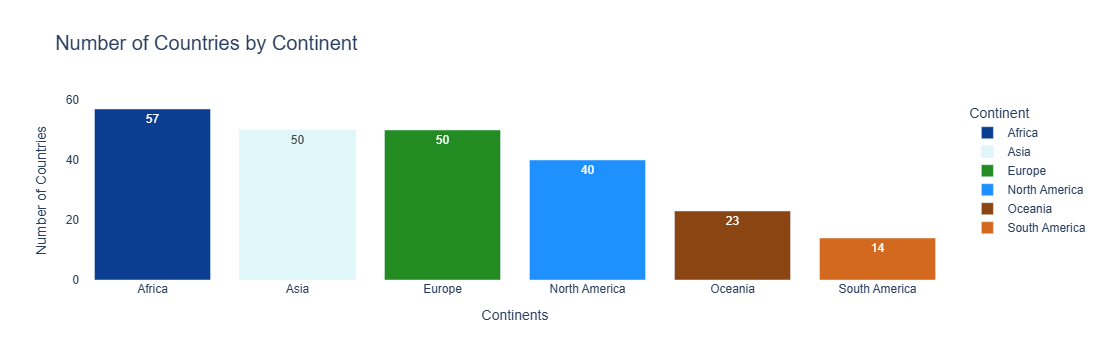

In [32]:
# Customize the layout
fig.update_layout(
xaxis_title='Continents',
yaxis_title='Number of Countries',
plot_bgcolor='rgba(0,0,0,0)', # Set the background color to transparent
font_family='Arial', # Set font family
title_font_size=20 # Set title font size
)

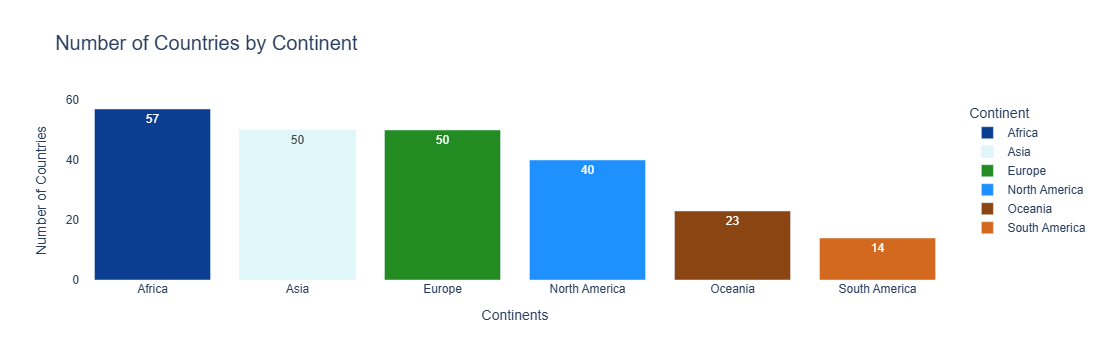

In [34]:
# Show the plot
fig.show()

In [36]:
continent_population_percentage = df.groupby('Continent')['World Population Percentage'].sum().reset_index()

In [38]:
# Create the pie chart
fig = go.Figure(data=[go.Pie(labels=continent_population_percentage['Continent'],
values=continent_population_percentage['World Population Percentage'])])

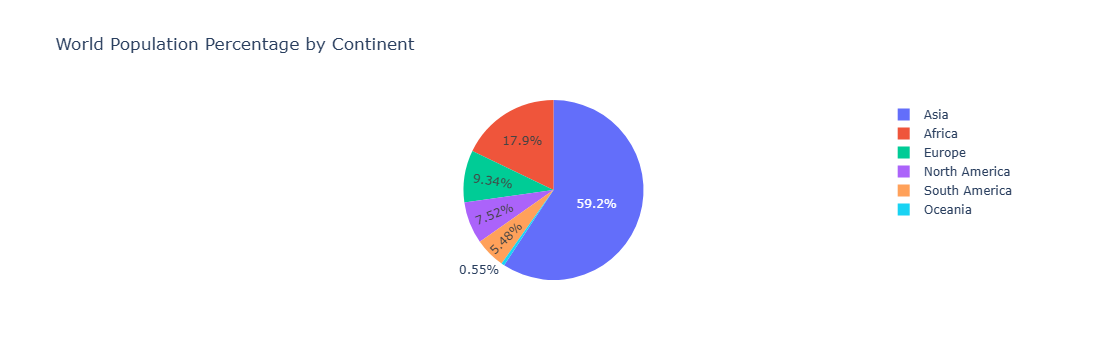

In [40]:
# Update layout
fig.update_layout(
title='World Population Percentage by Continent',
template='plotly',
paper_bgcolor='rgba(255,255,255,0)', # Set the paper background color to transparent
plot_bgcolor='rgba(255,255,255,0)' # Set the plot background color to transparent
)

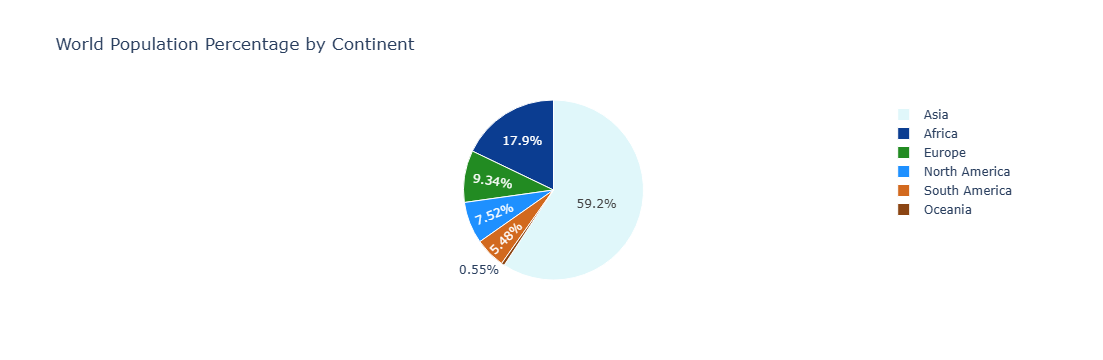

In [42]:
# Update pie colors
fig.update_traces(marker=dict(colors=custom_palette, line=dict(color='#FFFFFF', width=1)))

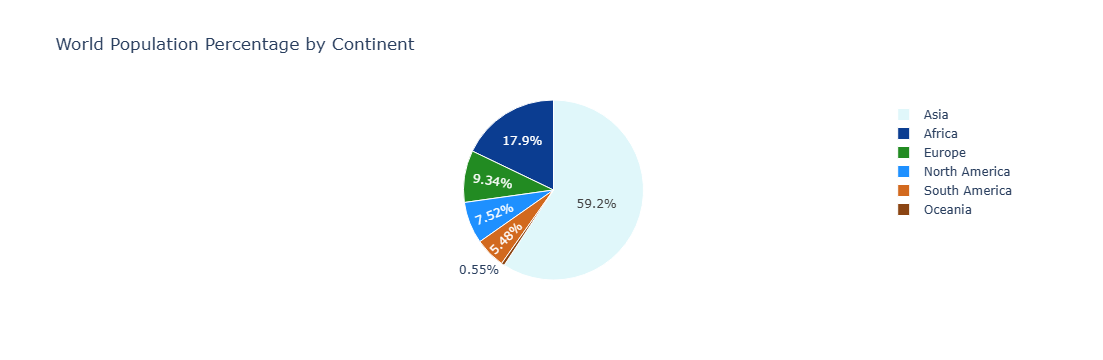

In [44]:
# Show the plot
fig.show()

In [46]:
# Melt the DataFrame to have a long format
df_melted = df.melt(id_vars=['Continent'], value_vars=['2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population'], var_name='Year', value_name='Population')

In [48]:
# Convert 'Year' to a more suitable format
df_melted['Year'] = df_melted['Year'].str.split().str[0].astype(int)

In [50]:
# Aggregate population by continent and year
population_by_continent = df_melted.groupby(['Continent', 'Year']).sum().reset_index()

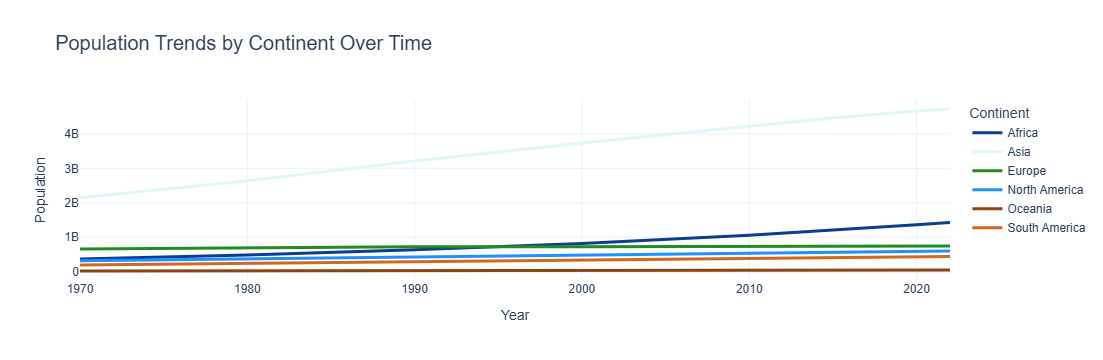

In [52]:
fig = px.line(population_by_continent, x='Year', y='Population', color='Continent', title='Population Trends by Continent Over Time', labels={'Population': 'Population', 'Year': 'Year'}, color_discrete_sequence=custom_palette)
fig.update_layout(template='plotly_white', xaxis_title='Year', yaxis_title='Population', font_family='Arial', title_font_size=20,)
fig.update_traces(line=dict(width=3))
fig.show()

In [54]:
# World Population Comparison: 1970 to 2020

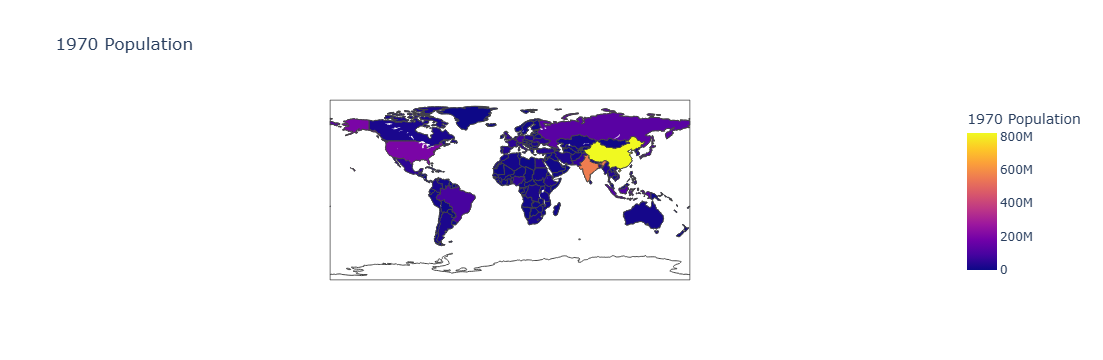

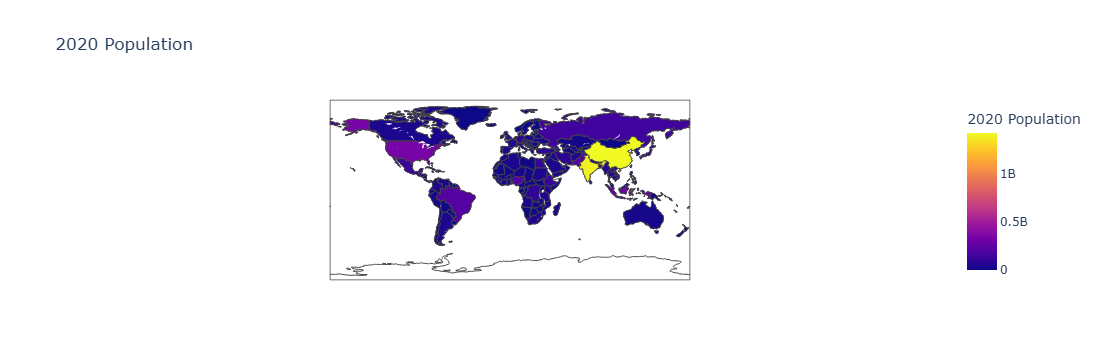

In [56]:
features=['1970 Population' ,'2020 Population']
for feature in features:
 fig = px.choropleth(df, locations='Country/Territory', locationmode='country names', color=feature, hover_name='Country/Territory', template='plotly_white', title=feature)
 fig.show()

In [58]:
growth = (df.groupby(by='Country/Territory')['2022 Population'].sum()-df.groupby(by='Country/Territory')['1970 Population'].sum()).sort_values(ascending=False).head(8)

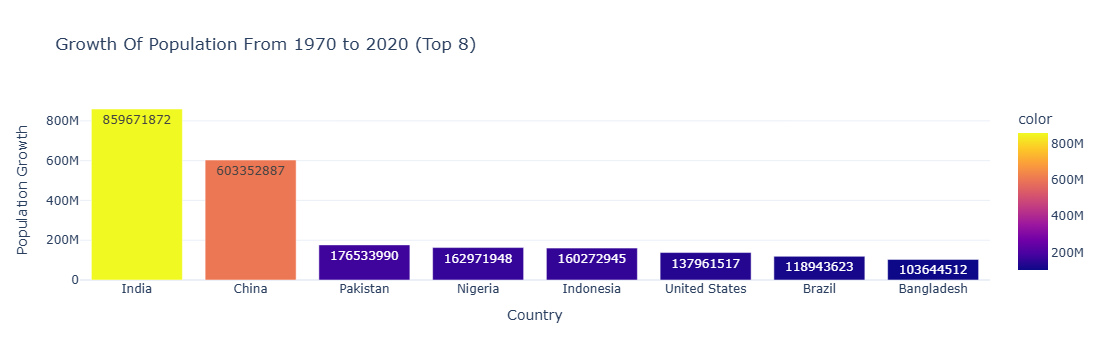

In [60]:
fig=px.bar(x=growth.index, y=growth.values, text=growth.values, color=growth.values, title='Growth Of Population From 1970 to 2020 (Top 8)', 
           template='plotly_white')
fig.update_layout(xaxis_title='Country', yaxis_title='Population Growth')
fig.show()

In [62]:
top_8_populated_countries_1970 = df.groupby('Country/Territory')['1970 Population'].sum().sort_values(ascending=False).head(8)
top_8_populated_countries_2022 = df.groupby('Country/Territory')['2022 Population'].sum().sort_values(ascending=False).head(8)

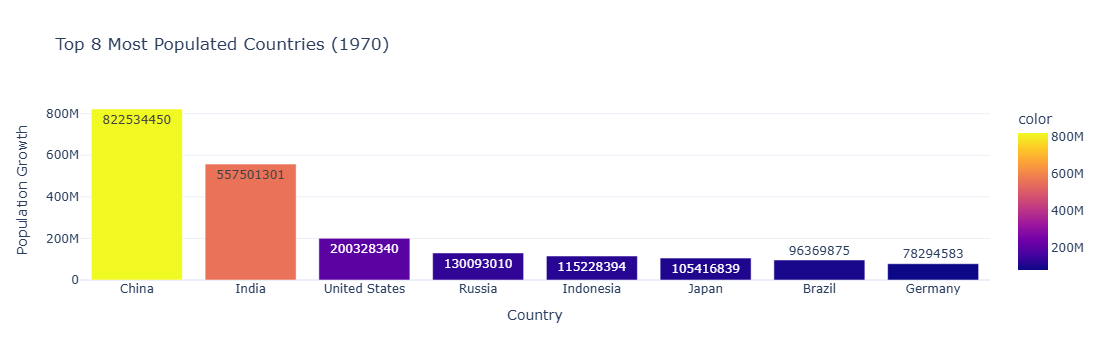

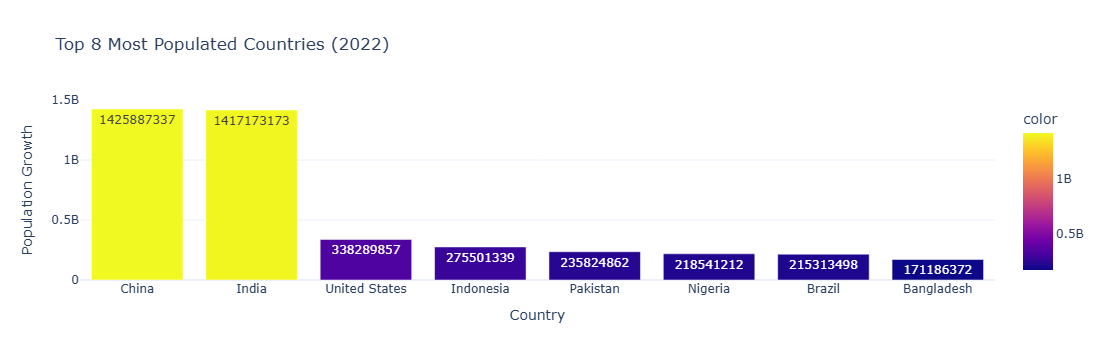

In [64]:
features = {'top_8_populated_countries_1970': top_8_populated_countries_1970,'top_8_populated_countries_2022': top_8_populated_countries_2022}
for feature_name, feature_data in features.items():
    year = feature_name.split('_')[-1]
    fig = px.bar(x=feature_data.index, y=feature_data.values, text=feature_data.values, color=feature_data.values, title=f'Top 8 Most Populated Countries ({year})', template='plotly_white')
    fig.update_layout(xaxis_title='Country', yaxis_title='Population Growth')
    fig.show()

In [66]:
# World Population Growth Rates: The Fastest Growing Countries

In [68]:
sorted_df_growth = df.sort_values(by='Growth Rate', ascending=False)
top_fastest = sorted_df_growth.head(6)
top_slowest = sorted_df_growth.tail(6)

In [70]:
def plot_population_trends(countries):
 # Calculate the number of rows needed
 n_cols=2
 n_rows=(len(countries) + n_cols- 1) // n_cols
 # Create subplots
 fig = sp.make_subplots(rows=n_rows, cols=n_cols, subplot_titles=countries, horizontal_spacing=0.1, vertical_spacing=0.1)
 for i, country in enumerate(countries, start=1):
 # Filter data for the selected country
  country_df = df[df['Country/Territory'] == country]
 # Melt the DataFrame to have a long format
  country_melted = country_df.melt(id_vars=['Country/Territory'], value_vars=['2022 Population', '2020 Population', '2015 Population', '2010 Population','2000 Population', '1990 Population', '1980 Population', '1970 Population'], var_name='Year', value_name='Population')
 # Convert 'Year' to a more suitable format
  country_melted['Year'] = country_melted['Year'].str.split().str[0].astype(int)
 # Create a line plot for each country
  line_fig = px.line(country_melted, x='Year', y='Population', color='Country/Territory', labels={'Population': 'Population', 'Year': 'Year'}, color_discrete_sequence=custom_palette)
 # Update the line plot to fit the subplot
  row = (i- 1) // n_cols + 1
  col = (i- 1) % n_cols + 1
  for trace in line_fig.data:
      fig.add_trace(trace, row=row, col=col)
 # Update the layout of the subplots
 fig.update_layout(title='Population Trends of Selected Countries Over Time', template='plotly_white', font_family='Arial', title_font_size=20, showlegend=False, height=600*n_rows,) # Adjust height for bigger plots
 fig.update_traces(line=dict(width=3))
 fig.update_xaxes(title_text='Year')
 fig.update_yaxes(title_text='Population')
 fig.show()

In [72]:
fastest = top_fastest[['Country/Territory', 'Growth Rate']].sort_values(by='Growth Rate', ascending=False).reset_index(drop=True)
fastest

,Country/Territory,Growth Rate
0,Moldova,1.0691
1,Poland,1.0404
2,Niger,1.0378
3,Syria,1.0376
4,Slovakia,1.0359
5,DR Congo,1.0325


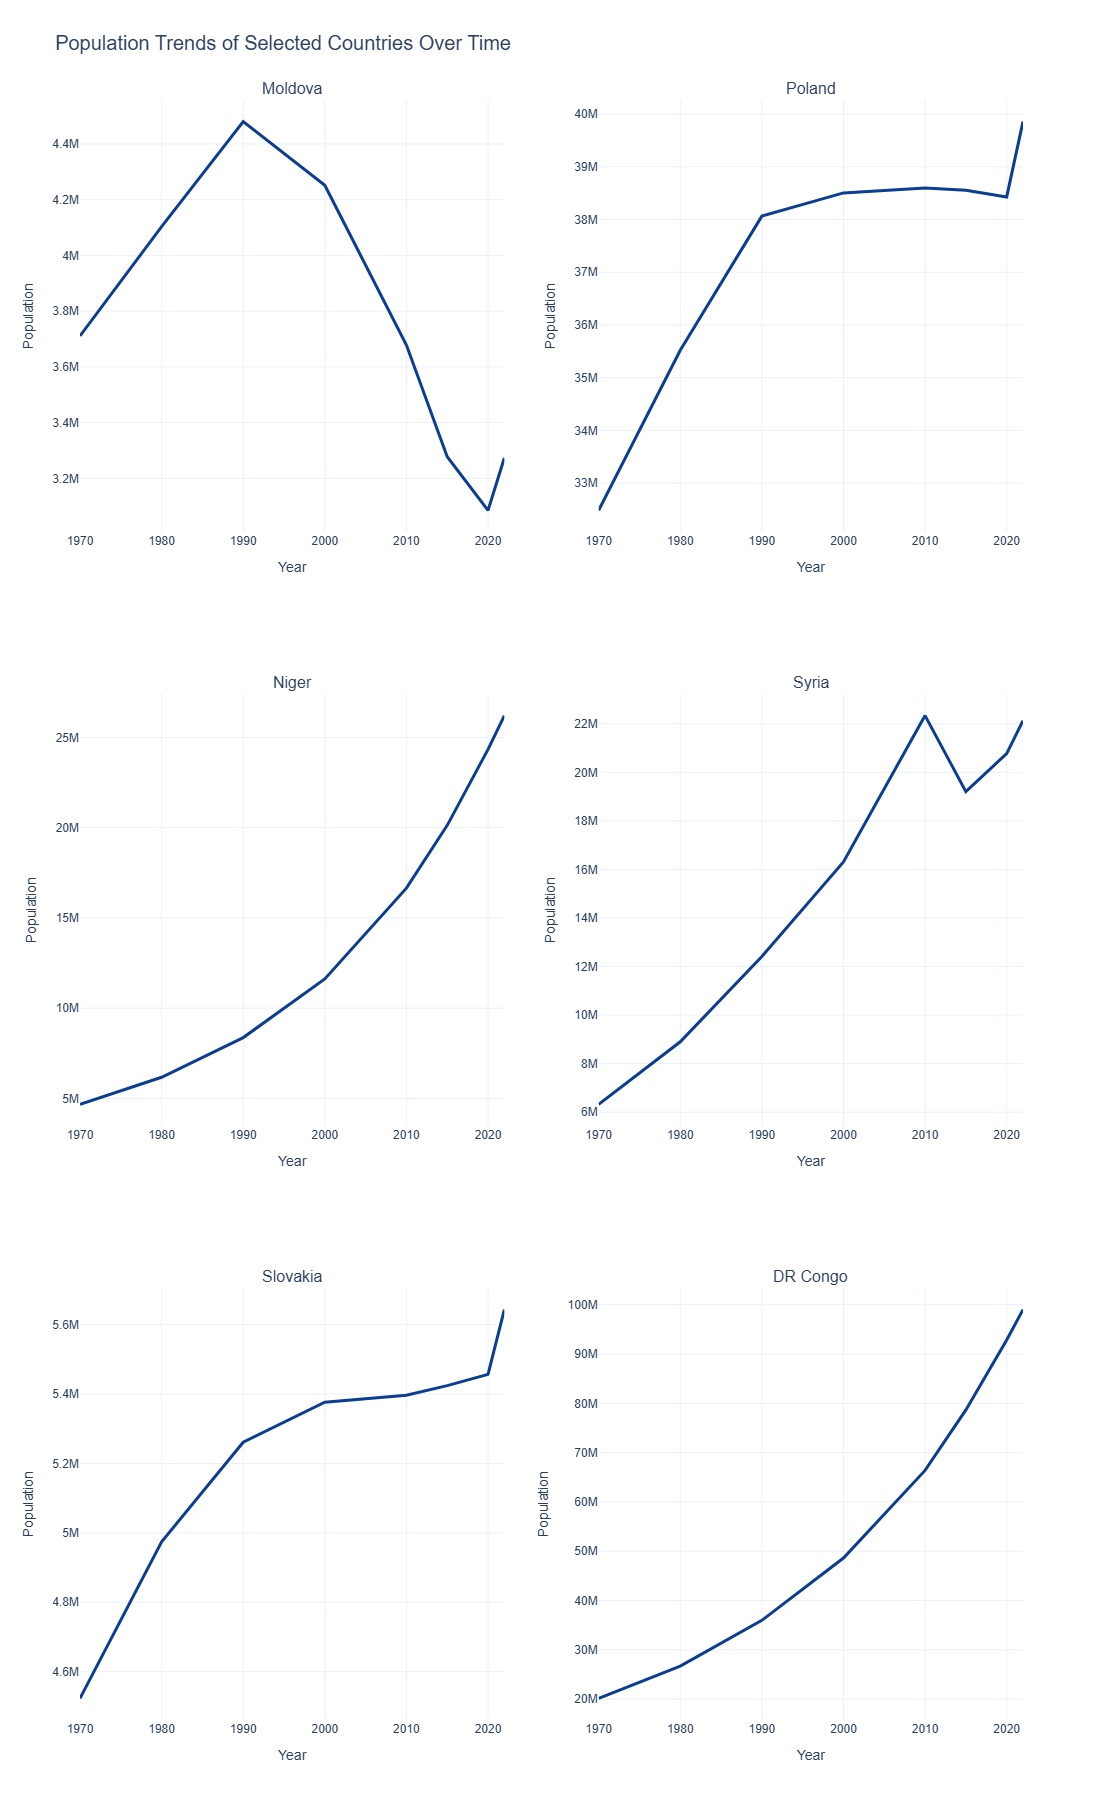

In [74]:
plot_population_trends(['Moldova', 'Poland', 'Niger', 'Syria', 'Slovakia', 'DR Congo'])

In [76]:
#  WorldPopulationGrowthRates:TheSlowestGrowingCountries

In [78]:
slowest = top_slowest[['Country/Territory', 'Growth Rate']].sort_values(by='Growth Rate', ascending=False).reset_index(drop=True)
slowest

,Country/Territory,Growth Rate
0,Latvia,0.9876
1,Lithuania,0.9869
2,Bulgaria,0.9849
3,American Samoa,0.9831
4,Lebanon,0.9816
5,Ukraine,0.9120


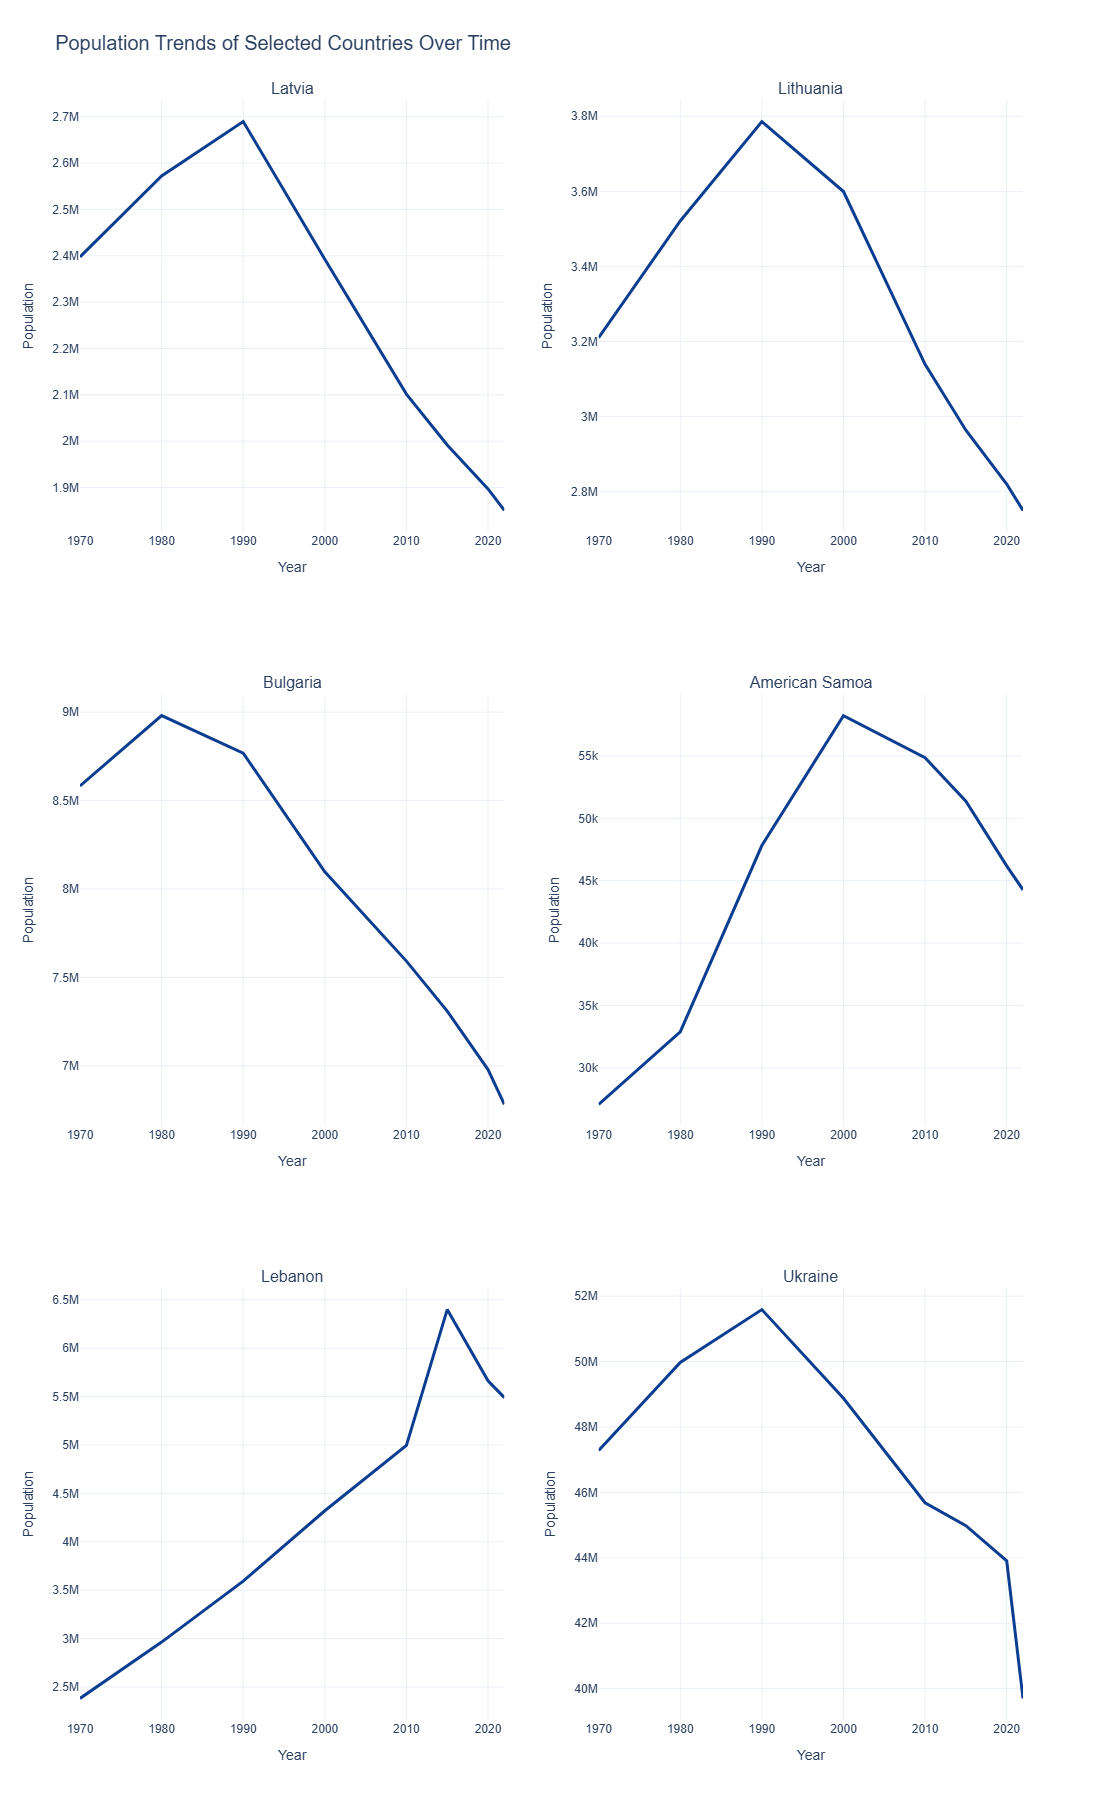

In [80]:
plot_population_trends(['Latvia', 'Lithuania', 'Bulgaria', 'American Samoa', 'Lebanon', 'Ukraine'])

In [82]:
# LandAreabyCountry

In [84]:
land_by_country = df.groupby('Country/Territory')['Area (kmÂ²)'].sum().sort_values(ascending=False)
most_land = land_by_country.head(5)
least_land = land_by_country.tail(5)

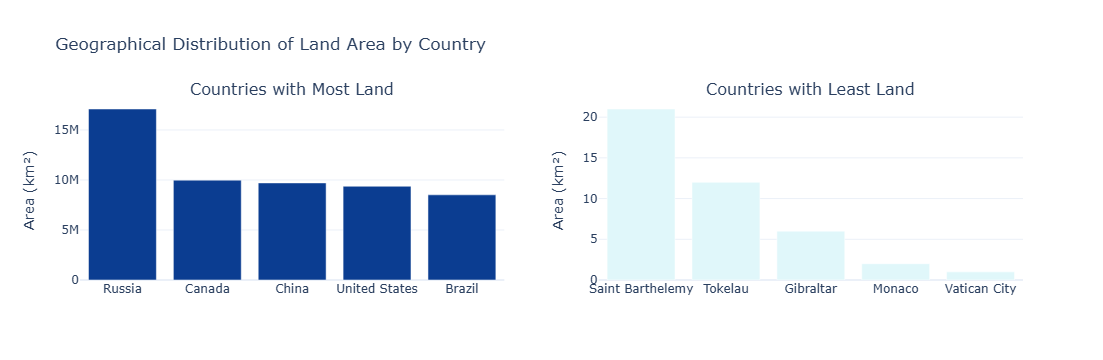

In [86]:
# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Countries with Most Land", "Countries with Least Land"))
# Plot countries with the most land
fig.add_trace(go.Bar(x=most_land.index, y=most_land.values, name='Most Land', marker_color=custom_palette[0]), row=1, col=1)
# Plot countries with the least land
fig.add_trace(go.Bar(x=least_land.index, y=least_land.values, name='Least Land', marker_color=custom_palette[1]), row=1, col=2)
fig.update_layout(title_text="Geographical Distribution of Land Area by Country", showlegend=False, template='plotly_white')
fig.update_yaxes(title_text="Area (km²)", row=1, col=1)
fig.update_yaxes(title_text="Area (km²)", row=1, col=2)
fig.show()

In [88]:
# LandAreaPerPersonbyCountry

In [90]:
df['Area per Person']=df['Area (kmÂ²)'] / df['2022 Population']
country_area_per_person = df.groupby('Country/Territory')['Area per Person'].sum()
most_land_available = country_area_per_person.sort_values(ascending=False).head(5)
least_land_available = country_area_per_person.sort_values(ascending=False).tail(5)

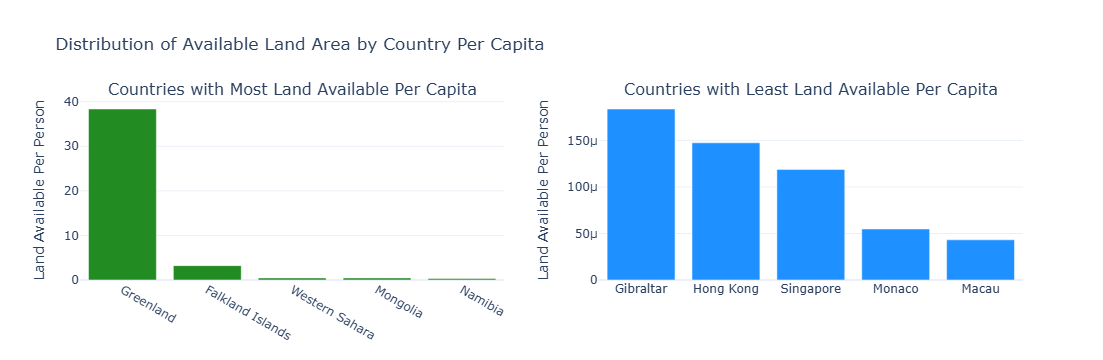

In [92]:
# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Countries with Most Land Available Per Capita", "Countries with Least Land Available Per Capita"))
# Plot countries with the most land
fig.add_trace(go.Bar(x=most_land_available.index, y=most_land_available.values, name='Most Land', marker_color=custom_palette[2]), row=1, col=1)
# Plot countries with the least land
fig.add_trace(go.Bar(x=least_land_available.index, y=least_land_available.values, name='Least Land', marker_color=custom_palette[3]), row=1, col=2)
fig.update_layout(title_text="Distribution of Available Land Area by Country Per Capita", showlegend=False, template='plotly_white')
fig.update_yaxes(title_text="Land Available Per Person", row=1, col=1)
fig.update_yaxes(title_text="Land Available Per Person", row=1, col=2)
fig.show()